# Replication notes

## Part 1) Replication with trained_models 'KEGG_keras_cnn_trained_model_shallow.h5

This part of the notebook shows the replication steps we took for CNNC using KEGG data.
We followed all the steps provided in the README.md file of https://github.com/xiaoyeye/CNNC

### 1. Converting data to NEPDF

    python get_xy_label_data_cnn_combine_from_database.py data/bulk_gene_list.txt data/sc_gene_list.txt data/mmukegg_new_new_unique_rand_labelx.txt data/mmukegg_new_new_unique_rand_labelx_num.txt data/mouse_bulk.h5 data/rank_total_gene_rpkm.h5 0  

### 2. Predicting the results

    python predict_no_y.py  3057 NEPDF_data  3 trained_models/KEGG_keras_cnn_trained_model_shallow.h5

### 3. ROC curve

In [1]:
import numpy as np
from sklearn.preprocessing import label_binarize

pdata = np.load('predict_results_no_y_1/y_predict.npy')
print(pdata.shape)

odata = np.genfromtxt('data/mmukegg_new_new_unique_rand_labelx.txt', delimiter = '\t', dtype=None)
original = []
for i in range(len(odata)):
    original.append(odata[i][2])
original = label_binarize(original, classes=[0,1,2])
n_classes = original.shape[1]

(92472, 3)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  import sys


In [2]:
from sklearn import metrics

fpr = []
tpr = []
roc_auc = []
for i in range(n_classes):
    ftemp, ttemp, _ = metrics.roc_curve(original[:,i], pdata[:,i])
    fpr.append(ftemp)
    tpr.append(ttemp)
    roc_auc.append(metrics.auc(fpr[i], tpr[i]))

roc_auc

[0.4695892712072304, 0.5460832825740763, 0.5231102809802212]

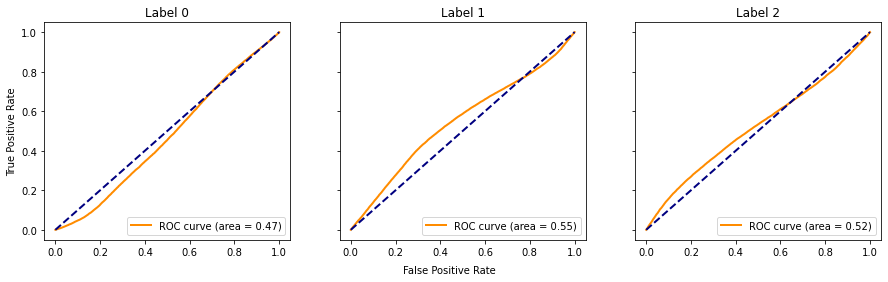

In [3]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
fig.set_figwidth(15)
lw = 2
ax1.plot(
    fpr[0],
    tpr[0],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[0],
)
ax1.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

ax2.plot(
    fpr[1],
    tpr[1],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[1],
)
ax2.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

ax3.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
ax3.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

ax1.set_title('Label 0')
ax1.legend(loc = 'lower right')
ax2.set_title('Label 1')
ax2.legend(loc = 'lower right')
ax3.set_title('Label 2')
ax3.legend(loc = 'lower right')

ax1.set(ylabel='True Positive Rate')
fig.text(0.5, 0.01, 'False Positive Rate', ha='center')
plt.savefig('Adam_predict.png')
plt.show()

#### As you can see from the graphs, the accuracy of your trained model doesn't seem to match those presented on your paper. We have tried several times, but the ROC curve stays the same this way.

## Part 2) Training a new model with the data provided

This part of the notebook shows the steps we took to train a new model using the KEGG data provided by the authors.
We followed all the steps for training a new model that is provided in the README.md file of https://github.com/xiaoyeye/CNNC

### 1. Converting data to NEPDF

    python get_xy_label_data_cnn_combine_from_database.py data/bulk_gene_list.txt data/sc_gene_list.txt data/mmukegg_new_new_unique_rand_labelx.txt data/mmukegg_new_new_unique_rand_labelx_num.txt data/mouse_bulk.h5 data/rank_total_gene_rpkm.h5 1 

### 2. Training the model

    python train_new_model/train_with_labels_three_foldx.py 3057 NEPDF_data 3 > results.txt

The parameter 'epochs' has been set to 1080 as it is written in the comments of your code. (line 27 of train_with_labels_three_foldx.py)<br>
The parameter 'monitor' has been changed from 'val_acc' to 'val_accuracy' since 'val_acc' is not compatible anymore with the current version of keras. (line 122 and 125 of train_with_labels_three_foldx.py)

### 3. Predicting the results

    python predict_no_y.py  3057 NEPDF_data  3 1YYYY_saved_models_T_32-32-64-64-128-128-512_e1080/keras_cnn_trained_model_shallow.h5

    python predict_no_y.py  3057 NEPDF_data  3 2YYYY_saved_models_T_32-32-64-64-128-128-512_e1080/keras_cnn_trained_model_shallow.h5

    python predict_no_y.py  3057 NEPDF_data  3 3YYYY_saved_models_T_32-32-64-64-128-128-512_e1080/keras_cnn_trained_model_shallow.h5

In [4]:
import numpy as np
from sklearn.preprocessing import label_binarize

pdata1 = np.load('predict_results_no_y_1_new1/y_predict.npy')
print(pdata1.shape)

pdata2 = np.load('predict_results_no_y_1_new2/y_predict.npy')
print(pdata2.shape)

pdata3 = np.load('predict_results_no_y_1_new3/y_predict.npy')
print(pdata3.shape)

odata = np.genfromtxt('data/mmukegg_new_new_unique_rand_labelx.txt', delimiter = '\t', dtype=None)
original = []
for i in range(len(odata)):
    original.append(odata[i][2])
odata = label_binarize(original, classes=[0,1,2])
n_classes = odata.shape[1]

n_classes1 = pdata1.shape[1]
n_classes2 = pdata2.shape[1]
n_classes3 = pdata3.shape[1]

(92472, 3)
(92472, 3)
(92472, 3)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  del sys.path[0]


In [5]:
from sklearn import metrics

fpr1 = []
tpr1 = []
roc_auc1 = []
for i in range(n_classes1):
    ftemp, ttemp, _ = metrics.roc_curve(odata[:,i], pdata1[:,i])
    fpr1.append(ftemp)
    tpr1.append(ttemp)
    roc_auc1.append(metrics.auc(fpr1[i], tpr1[i]))

print(roc_auc1)

fpr2 = []
tpr2 = []
roc_auc2 = []
for i in range(n_classes2):
    ftemp, ttemp, _ = metrics.roc_curve(odata[:,i], pdata2[:,i])
    fpr2.append(ftemp)
    tpr2.append(ttemp)
    roc_auc2.append(metrics.auc(fpr2[i], tpr2[i]))

print(roc_auc2)

fpr3 = []
tpr3 = []
roc_auc3 = []
for i in range(n_classes3):
    ftemp, ttemp, _ = metrics.roc_curve(odata[:,i], pdata3[:,i])
    fpr3.append(ftemp)
    tpr3.append(ttemp)
    roc_auc3.append(metrics.auc(fpr3[i], tpr3[i]))

print(roc_auc3)

roc_auc = []
for i in range(3):
    roc_auc.append(np.mean([roc_auc1[i], roc_auc2[i], roc_auc3[i]], dtype=float))
print(roc_auc)

[0.8165262668114525, 0.8089291914110764, 0.8427790458107849]
[0.8538975622985558, 0.8580023092813169, 0.8684036761097169]
[0.8481519781792044, 0.8309154707904708, 0.8509442882130165]
[0.8395252690964042, 0.8326156571609546, 0.8540423367111728]


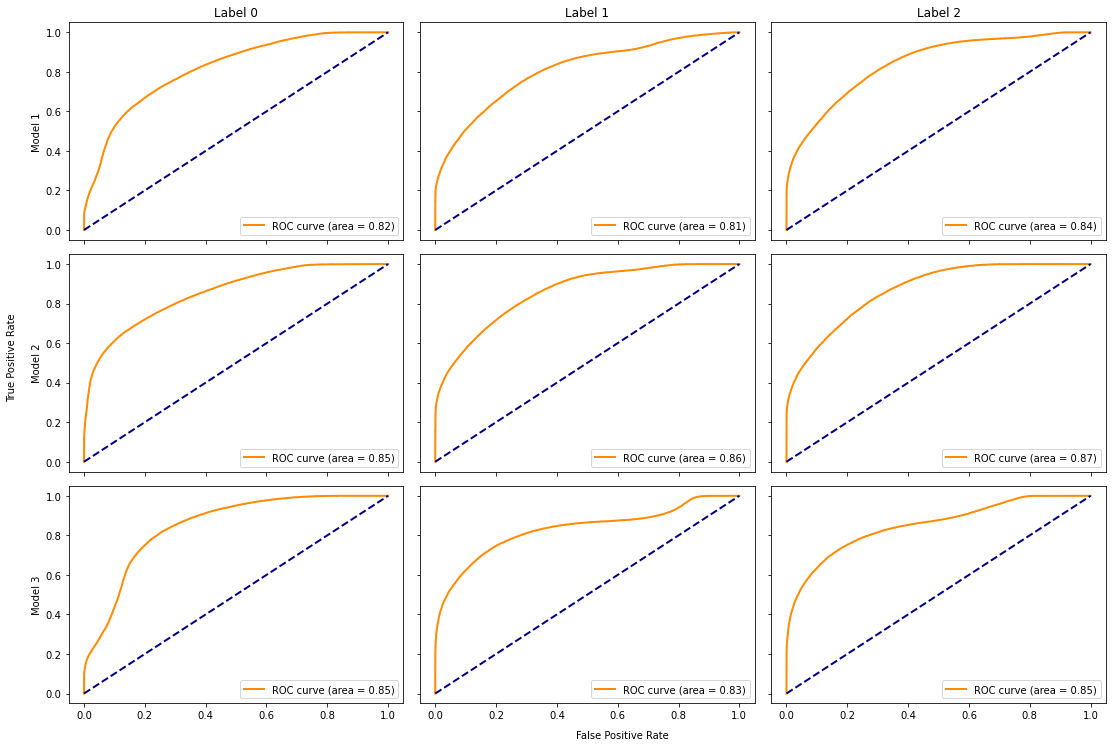

In [6]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, constrained_layout=True)
fig.set_figwidth(15)
fig.set_figheight(10)
lw = 2
axs[0,0].plot(
    fpr1[0],
    tpr1[0],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc1[0],
)
axs[0,0].plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

axs[0,1].plot(
    fpr1[1],
    tpr1[1],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc1[1],
)
axs[0,1].plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

axs[0,2].plot(
    fpr1[2],
    tpr1[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc1[2],
)
axs[0,2].plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

axs[1,0].plot(
    fpr2[0],
    tpr2[0],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc2[0],
)
axs[1,0].plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

axs[1,1].plot(
    fpr2[1],
    tpr2[1],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc2[1],
)
axs[1,1].plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

axs[1,2].plot(
    fpr2[2],
    tpr2[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc2[2],
)
axs[1,2].plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

axs[2,0].plot(
    fpr3[0],
    tpr3[0],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc3[0],
)
axs[2,0].plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

axs[2,1].plot(
    fpr3[1],
    tpr3[1],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc3[1],
)
axs[2,1].plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

axs[2,2].plot(
    fpr3[2],
    tpr3[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc3[2],
)
axs[2,2].plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

axs[0,0].set_title('Label 0')
axs[0,0].legend(loc = 'lower right')
axs[0,1].set_title('Label 1')
axs[0,1].legend(loc = 'lower right')
axs[0,2].set_title('Label 2')
axs[0,2].legend(loc = 'lower right')
# axs[1,0].set_title('Label 0')
axs[1,0].legend(loc = 'lower right')
# axs[1,1].set_title('Label 1')
axs[1,1].legend(loc = 'lower right')
# axs[1,2].set_title('Label 2')
axs[1,2].legend(loc = 'lower right')
# axs[2,0].set_title('Label 0')
axs[2,0].legend(loc = 'lower right')
# axs[2,1].set_title('Label 1')
axs[2,1].legend(loc = 'lower right')
# axs[2,2].set_title('Label 2')
axs[2,2].legend(loc = 'lower right')

axs[0,0].set(ylabel='Model 1')
axs[1,0].set(ylabel='Model 2')
axs[2,0].set(ylabel='Model 3')
fig.text(0.55, -0.02, 'False Positive Rate', ha='center')
fig.text(-0.02, 0.45, 'True Positive Rate', rotation='vertical')
plt.show()

#### The accuracy with newly trained models are much higher than then provided models, but these new models are still not as accurate as what you have presented in your paper.

### 4. Train and Validation accuracy and loss

To ensure that the high accuracy of the newly-trained models are valid, we checked the end_result.jpg file in the YYYY folder.

![end_result1](end_result1-1.png)
![end_result2](end_result2-1.png)
![end_result3](end_result3-1.png)

As you can see from the images above, both training and validation set losses are high in all of the models, indicating an underfitting of the data, not to mention the low accuracy of validation set.